In [3]:
# Import the necessary geometric objects from the shapely module
from shapely.geometry import Point, LineString, Polygon

### Points

In [87]:
point1 = Point(7.25, -25.1)
point2 = Point(9.26, -2.456)
point3 = Point(10.34, -2.546)
point3D = Point(9.26, -2.456, 0.57)

In [9]:
point1.y

-25.1

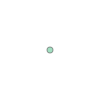

In [9]:
point3D

#### Visualizing information from the points

In [10]:
print(point1)
print(point3D)

POINT (7.25 -25.1)
POINT Z (9.26 -2.456 0.57)


In [11]:
str(point1)

'POINT (7.25 -25.1)'

In [14]:
point3D.geom_type

'Point'

In [138]:
type(point1)

shapely.geometry.point.Point

In [16]:
# Get coordinates of the point (returns a CoordinateSequence instance)
point1.coords

In [18]:
list(point1.coords)

[(7.25, -25.1)]

In [19]:
# Get the individual coordinate values
print(point1.x)
print(point1.y)

7.25
-25.1


In [22]:
## Calculating distances
distance = point1.distance(point2)
print(f'The distance between the points is {distance} meters')

The distance between the points is 22.733034025400134 meters


### LineStrings

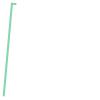

In [28]:
# Creating a LineString from 3 points
line1 = LineString([point1, point2, point3])
line1

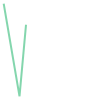

In [29]:
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line2

In [30]:
line1 == line2

False

#### Getting a WKT Representation

In [36]:
line1.to_wkt()

'LINESTRING (7.2500000000000000 -25.1000000000000014, 9.2599999999999998 -2.4560000000000000, 10.3399999999999999 -2.5459999999999998)'

In [34]:
line2.wkt

'LINESTRING (7.25 -25.1, 9.26 -2.456, 10.34 -2.546)'

In [35]:
line1.wkt

'LINESTRING (7.25 -25.1, 9.26 -2.456, 10.34 -2.546)'

In [37]:
print(line1)

LINESTRING (7.25 -25.1, 9.26 -2.456, 10.34 -2.546)


In [38]:
type(line1)

shapely.geometry.linestring.LineString

In [41]:
line1.geom_type

'LineString'

In [40]:
list(line1.coords)

[(7.25, -25.1), (9.26, -2.456), (10.34, -2.546)]

In [42]:
# Extract  x and y coordinates separately
line2.xy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [67]:
x_list = list(line2.xy[0])
x_list

[2.2, 7.2, 9.26]

In [68]:
y_list = list(line2.xy[1])
y_list

[4.2, -25.1, -2.456]

In [73]:
coords_list = zip(x_list, y_list)
coords_list

In [74]:
lt = list(coords_list)

In [76]:
lt

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

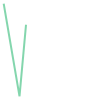

In [78]:
LineString(lt)

In [79]:
LineString(lt) == line2

True

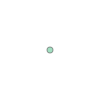

In [83]:
line1.centroid

In [84]:
line1.centroid.wkt

'POINT (8.325302698320346 -13.26485855730838)'

### Polygons


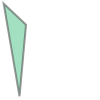

In [85]:
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
poly

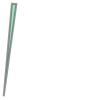

In [94]:
poly2 = Polygon([(point.x, point.y) for point in[point1, point2, point3]])
poly2

In [95]:
poly.geom_type

'Polygon'

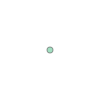

In [96]:
poly2.centroid

In [97]:
poly2.intersects(poly2.centroid)

True

#### Polygons with holes

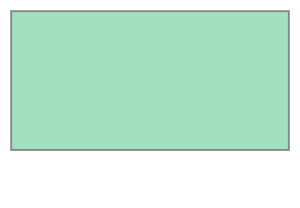

In [99]:
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
world = Polygon(shell=border)
world

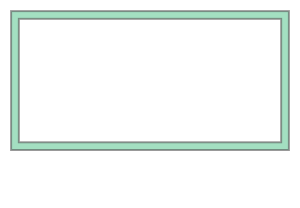

In [101]:
hole = [(-170, 80), (-170, -80), (170, -80), (170, 80)]
frame = Polygon(shell=border, holes=[hole])
frame

In [102]:
print(f'Polygon centroid: {world.centroid}')
print(f'Polygon area: {world.area}')
print(f'Polygon BBOX: {world.bounds}')
print(f'Polygon exterior: {world.exterior}')
print(f'Polygon exterior length: {world.length}')

Polygon centroid: POINT (-0 -0)
Polygon area: 64800.0
Polygon BBOX: (-180.0, -90.0, 180.0, 90.0)
Polygon exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon exterior length: 1080.0


### Creating Shapes using Shapely

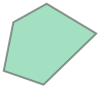

In [111]:
# Pentagon
pentagon = Polygon([(30, 24.05), (36, 54.34), (56.76, 65.9), (87.67, 47.34), (54.8, 15.45)])
pentagon

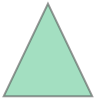

In [119]:
triangle = Polygon([(30, 24.05), (50, 65.9), (70, 24.05)])
triangle

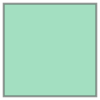

In [115]:
squared = Polygon([(30, 24.05), (30, 54.05), (60, 54.05), (60, 24.05)])
squared

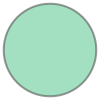

In [118]:
circle = Point([(30, 24.05)]).buffer(30)
circle

In [121]:
circle.geom_type

'Polygon'

In [125]:
circle.wkt

'POLYGON ((60 24.05, 59.85554180016591 21.10948579011319, 59.42355841209691 18.19729033951616, 58.70821007196626 15.34145968236614, 57.71638597533861 12.56949702904732, 56.45763793045066 9.908097895220084, 54.94408836907637 7.382893009411948, 53.19031360088212 5.018201475090653, 51.21320343559644 2.836796564403588, 49.03179852490939 0.859686399117912, 46.6671069905881 -0.8940883690763393, 44.14190210477996 -2.407637930450633, 41.48050297095273 -3.666385975338589, 38.7085403176339 -4.658210071966256, 35.85270966048389 -5.373558412096905, 32.94051420988686 -5.805541800165901, 30.00000000000005 -5.949999999999999, 27.05948579011323 -5.805541800165912, 24.14729033951621 -5.373558412096923, 21.29145968236618 -4.658210071966284, 18.51949702904736 -3.666385975338624, 15.85809789522013 -2.407637930450679, 13.33289300941199 -0.8940883690763926, 10.96820147509068 0.8596863991178552, 8.786796564403616 2.836796564403535, 6.809686399117926 5.018201475090596, 5.055911630923671 7.382893009411891, 3.5

### Multigeometries

In [126]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

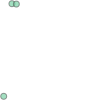

In [130]:
# Multipoint
multi_point = MultiPoint([point1, point2, point3])
multi_point

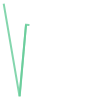

In [132]:
multi_line = MultiLineString([line1, line2])
multi_line

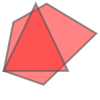

In [133]:
multi_poly = MultiPolygon([pentagon, triangle])
multi_poly

In [136]:
for geom in multi_poly.geoms:
    print(geom)

POLYGON ((30 24.05, 36 54.34, 56.76 65.90000000000001, 87.67 47.34, 54.8 15.45, 30 24.05))
POLYGON ((30 24.05, 50 65.90000000000001, 70 24.05, 30 24.05))
